# Regression for the Prime Counting Function

Model: $y = A + B\frac{x}{\log x}$.
<br><br>


## Get Data using Sieve of Eratosthenes


In [19]:
def sieve_bool_array(n: int) -> list[bool]:
    """Return a boolean list where True means prime, up to n."""
    if n < 2:
        return [False] * (n + 1)

    is_prime = [True] * (n + 1)
    is_prime[0] = is_prime[1] = False

    p = 2
    while p * p <= n:
        if is_prime[p]:
            for multiple in range(p * p, n + 1, p):
                is_prime[multiple] = False
        p += 1
    return is_prime


def prime_pi_data_range(start_x: int, end_x: int, step: int) -> tuple[list[int], list[int]]:
    """
    Generate (x_list, pi_list) where:
      x_list = [start_x, start_x+step, ..., end_x]
      pi_list = [pi(x) for x in x_list]

    Parameters:
        start_x (int): Starting x value (>= 1).
        end_x   (int): Ending x value.
        step    (int): Step size for x values.

    Returns:
        tuple[list[int], list[int]]
    """
    # Safety check
    if start_x < 1:
        start_x = 1
    if step <= 0:
        raise ValueError("Step size must be positive.")
    if end_x < start_x:
        return [], []

    # Step 1: Sieve up to end_x
    is_prime = sieve_bool_array(end_x)

    # Step 2: Precompute pi(x)
    pi = [0] * (end_x + 1)
    count = 0
    for i in range(1, end_x + 1):
        if is_prime[i]:
            count += 1
        pi[i] = count

    # Step 3: Build x_list and pi_list
    x_list = list(range(start_x, end_x + 1, step))
    pi_list = [pi[x] for x in x_list]

    return x_list, pi_list



In [20]:
import numpy as np, math
# --- User input ---
x_list, pi_list = prime_pi_data_range(2,10**5,5)
#print("x_list:", x_list)
#print("pi_list:", pi_list)        
x = np.array(x_list, dtype=float)
y = np.array(pi_list, dtype=float)
assert np.all(x>1) and np.all(y>0), 'Require x>1 and y>0'


In [21]:
# Build regressor z = x/log x
z = x/np.log(x)
n = len(x)
Sz, Sy = z.sum(), y.sum()
Sz2 = (z*z).sum()
Szy = (z*y).sum()
Den = n*Sz2 - Sz*Sz
A1 = (Sy*Sz2 - Sz*Szy) / Den
B1 = (n*Szy - Sz*Sy) / Den
print(f'Model (i) parameters: A = {A1:.6f}, B = {B1:.6f}')
y_pred = A1 + B1*z
lse = ((y - y_pred)**2).sum()
print(f"Least squares error = {lse:.6f}")

Model (i) parameters: A = 37.227738, B = 1.101152
Least squares error = 1698072.500559


In [25]:
# Example prediction at x = 10^5
x_new = 10**10
z_new = x_new / np.log(x_new)
y_pred_new = A1 + B1 * z_new
print(f"Prediction: pi({x_new}) ≈ {y_pred_new:.2f}")
print("Actual Correct Value of PrimePi(10^10): ",455052511)

Prediction: pi(10000000000) ≈ 478224353.98
Actual Correct Value of PrimePi(10^10):  455052511


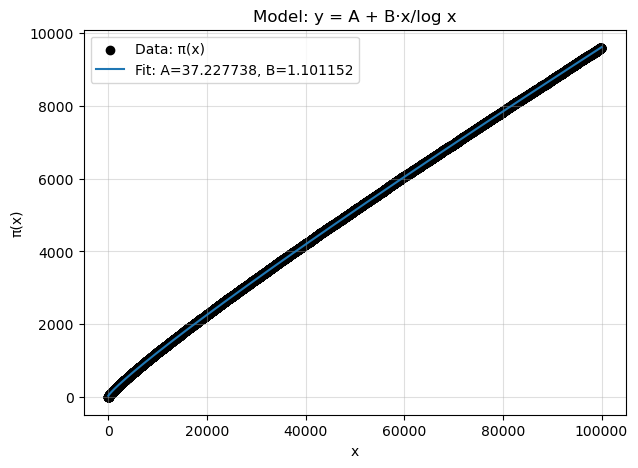

In [23]:
# Plot for Model (i)
import matplotlib.pyplot as plt
xplot = np.linspace(min(x), max(x), 500)
yhat1 = A1 + B1*(xplot/np.log(xplot))
plt.figure(figsize=(7,5))
plt.scatter(x, y, color='black', label='Data: π(x)')
plt.plot(xplot, yhat1, color='tab:blue', label=f'Fit: A={A1:.6f}, B={B1:.6f}')
plt.xlabel('x')
plt.ylabel('π(x)')
plt.title('Model: y = A + B·x/log x')
plt.legend()
plt.grid(True, alpha=0.4)
plt.show()
